In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\Dell'

In [3]:
os.chdir('E:/4 SNU/Python ML files')

In [19]:
data = pd.read_csv('train_bm.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data = data.fillna(value = data['Item_Weight'].mean())

In [6]:
data = pd.get_dummies(data.drop(['Item_Identifier'], axis = 1))

In [7]:
x = data.drop(['Item_Outlet_Sales'], axis = 1)
y = data['Item_Outlet_Sales']

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [10]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 56)

In [11]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [12]:
def Elbow(k):
    test_mse = []
    for i in k:
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        tmp = reg.predict(test_x)
        tmp = mse(tmp, test_y)
        test_mse.append(tmp)
    return test_mse

In [13]:
k = range(1,40)

In [16]:
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for Test')

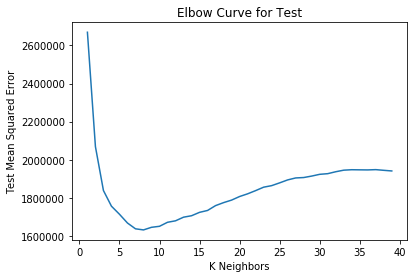

In [21]:
plt.plot(k, test)
plt.xlabel('K Neighbors')
    plt.ylabel('Test Mean Squared Error')
    plt.title('Elbow Curve for Test')

In [24]:
reg = KNN(n_neighbors = 9)
reg.fit(train_x, train_y)
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE ', k)

Test MSE  1645409.6244073529
